In [8]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd

In [9]:
# t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/no_merge_trim+trim_output/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/batch2/wgsa2/outputs/for_analyze_with_microbiomedb.biom")
# t = load_table("/Volumes/TBHD_share/valencia/3sample/batch2/wgsa2/outputs/TAXprofiles/MAGs_TAX/MAG-based_Counts+TAX.biom")
# t = load_table("/Volumes/TBHD_share/walitt_sample/3sample/outputs/for_analyze_with_microbiomedb.biom")
t = load_table("/Volumes/TBHD_share/valencia/bmock12/NEPHELE/wgsa2/subset_bmock12/outputs/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

# Constructed from biom file
#OTU ID	1
2	21515790.0
3	209161.0
4	79629.0
5	137608.0
6	807.0
7	2164.0
8	18692162.0
9	9562490.0
10	7487700.0
11	34055.0
12	31174.0
13	12866.0
14	3540.0
15	3336.0
16	2644.0
17	2454.0
18	2339.0
19	1998.0
20	1821.0
21	1750.0
22	1743.0
23	1518.0
24	1416.0
25	1050.0
26	1047.0
27	881.0
28	581.0
29	366.0
30	220.0
31	4.0
32	3.0
33	1.0
34	1.0
35	43641.0
36	5052.0
37	3592.0
38	3325.0
39	2285.0
40	2024.0
41	1074.0
42	1016.0
43	1003.0
44	894.0
45	870.0
46	614.0
47	252.0
48	216.0
49	0.0
50	2194.0
51	707.0
52	394.0
53	178.0
54	117.0
55	299.0
56	184.0
57	1307.0
58	75.0
59	67.0
60	0.0
61	1066.0
62	0.0
63	789.0
64	0.0
65	332.0
66	0.0
67	248.0
68	1.0
69	7.0
70	0.0
71	3.0
72	305.0
73	921.0
74	2381.0
75	633.0
76	484.0
77	197.0
78	1527.0
79	848.0
80	846.0
81	667.0
82	509.0
83	114.0
84	0.0
85	4659.0
86	1249.0
87	321.0
88	0.0
89	2657.0
90	0.0
91	1928.0
92	0.0
93	882.0
94	649.0
95	378.0
96	0.0
97	1049.0
98	0.0
99	423.0
100	0.0
101	217.0
102	0.0
103	694.0
104	950.0
105	396.0
106	3

array(['2', '3', '4', ..., '8089', '8090', '8091'], dtype='<U4')

In [10]:
# Use 6 for species, 5 for genus.

phylum_idx = 5
# Somtimes taxonomy is capitalized, sometimes not.
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][phylum_idx:phylum_idx + 1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()
col1.rename(index={'':'Unclassified'},inplace=True)

print(col1.sum(axis=0))
# col1.to_csv('test.csv')
# col1.drop('Unclassified_sp', inplace=True)

,1
,22201.067647
Halomonas,875976.048780
Pistricoccus,1097.000000
Cobetia,339.000000
Kushneria,408.250000
...,...
Moumouvirus,1.000000
Yellowstone_lake_mimivirus,1.000000
Aviadenovirus,10.500000
Betacoronavirus,0.500000


,1
,22201.067647
Halomonas,875976.048780
Pistricoccus,1097.000000
Cobetia,339.000000
Kushneria,408.250000
...,...
Moumouvirus,1.000000
Yellowstone_lake_mimivirus,1.000000
Aviadenovirus,10.500000
Betacoronavirus,0.500000


1    8.227086e+06
dtype: float64


,1
Unclassified,2.698534e-03
Halomonas,1.064746e-01
Pistricoccus,1.333400e-04
Cobetia,4.120536e-05
Kushneria,4.962267e-05
...,...
Moumouvirus,1.215497e-07
Yellowstone_lake_mimivirus,1.215497e-07
Aviadenovirus,1.276272e-06
Betacoronavirus,6.077486e-08


,1
Unclassified,0.002699
Halomonas,0.106475
Marinobacter,0.116874
Psychrobacter,0.029287
Cohaesibacter,0.416839
Thioclava,0.086490
Muricauda,0.156117
Maribacter,0.003589
Cellulophaga,0.002004
Winogradskyella,0.001469


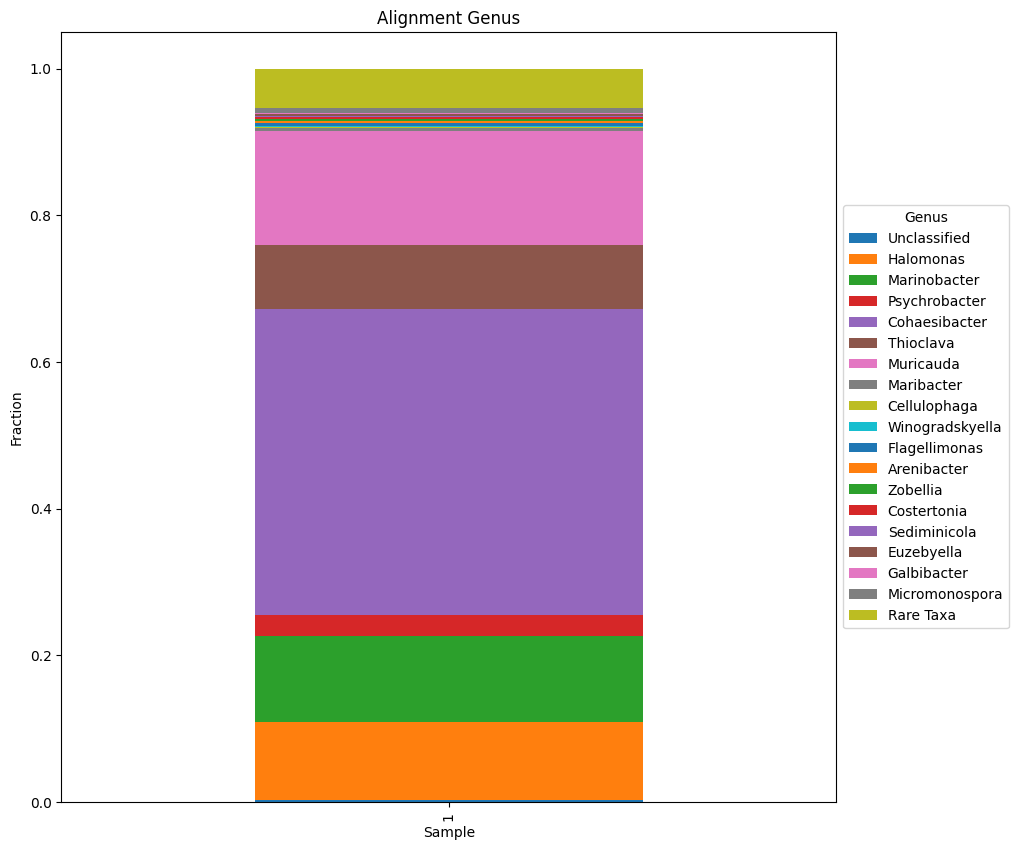

In [16]:
# Percent abundance operation.
pct = col1.apply(lambda x: x / x.sum(), axis=0)
display(pct)
pct.to_csv("pipelines/bmock12/wgsa2/fullpct_genus.csv", header=["Count"], index_label="Genus")

# Drop features with less than x percent abundance.
pct = pct.where(pct >= 0.001).dropna()

# Add other category to account for dropped samples.
pct.loc['Rare Taxa']= 1.0 - pct.sum(numeric_only=True, axis=0)
display(pct)
# pct.to_csv("pipelines/bmock12/wgsa2/0-001pct.csv")

# import matplotlib
# matplotlib.style.use('ggplot') 
pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample", title="Alignment Genus").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Genus")

In [12]:
# Sort the values by the first sample in ascending order.
pct.T
pct.sort_values(axis=0, ascending=False, by=pct.columns[0], inplace=True)

In [13]:
# Plot with seaborn.
import plotly.express as px
fig = px.bar(pct.T, x=pct.index, y=pct.columns, title="Alignment Species", labels={'index': 'Sample', 'value': 'Fraction', "variable": "Species"})
fig.show()

In [14]:
# Sanity check to make sure my operations are correct.

test_df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])

pct_test = test_df.apply(lambda x: x / x.sum(), axis=0)
display(pct_test)

pct_test = pct_test.where(pct_test >= 0.50).dropna()
display(pct_test)

pct_test.loc['Column_Total']= 1.0 - pct_test.sum(numeric_only=True, axis=0)
display(pct_test)

,a,b,c
0,0.083333,0.133333,0.166667
1,0.333333,0.333333,0.333333
2,0.583333,0.533333,0.500000


,a,b,c
2,0.583333,0.533333,0.5


,a,b,c
2,0.583333,0.533333,0.5
Column_Total,0.416667,0.466667,0.5
